In [5]:
import matplotlib.pyplot as plt
import numpy as np

x0 = [900, 1500, 2100]
x1 = [660, 1260, 1860, 2460]
x2 = [480, 960, 1440, 1920]

y00 = [0.60348397, 0.56348397,0.53948397]
y10 = [0.55548397, 0.53148397, 0.41548397,0.39548397]
y20 = [0.54748397, 0.42348397,0.35548397,0.28348397]

y01 = np.log(y00)
y10 = np.log(y10)
y20 = np.log(y20)

y03 = 1/np.array(y00)
y13 = 1/np.array(y10)
y23 = 1/np.array(y20)

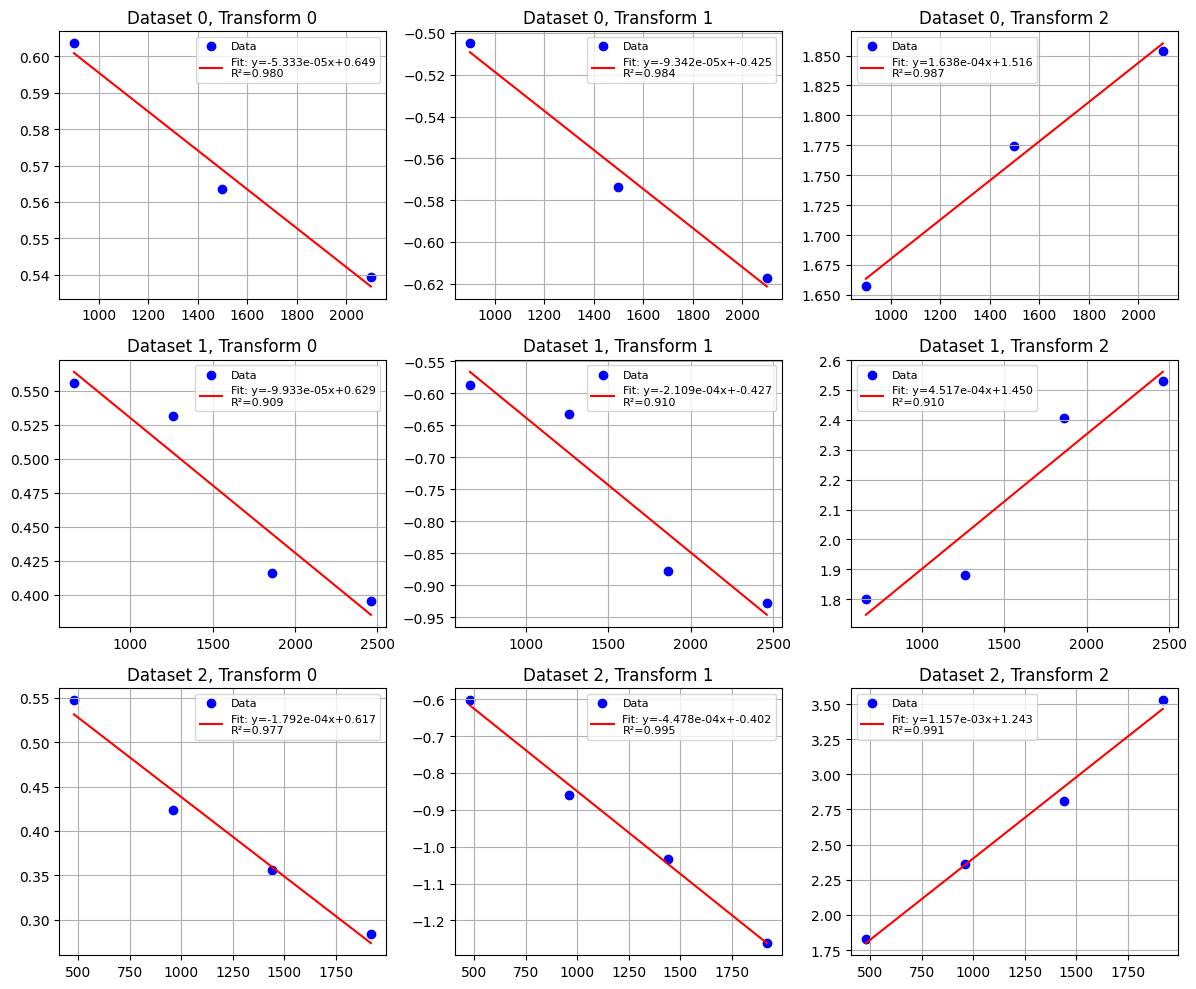

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 원본 데이터
x0 = np.array([900, 1500, 2100])
x1 = np.array([660, 1260, 1860, 2460])
x2 = np.array([480, 960, 1440, 1920])

y00 = np.array([0.60348397, 0.56348397, 0.53948397])
y10 = np.array([0.55548397, 0.53148397, 0.41548397, 0.39548397])
y20 = np.array([0.54748397, 0.42348397, 0.35548397, 0.28348397])

# 변환된 데이터
y01 = np.log(y00)
y11 = np.log(y10)
y21 = np.log(y20)

y03 = 1/np.array(y00)
y13 = 1/np.array(y10)
y23 = 1/np.array(y20)

# 데이터 묶음
x_list = [x0, x1, x2]
y_list = [
    [y00, y01, y03],
    [y10, y11, y13],
    [y20, y21, y23]
]

# 플롯 설정
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i in range(3):      # 행 (dataset 종류)
    for j in range(3):  # 열 (변환 종류)
        ax = axes[i, j]
        x = x_list[i].reshape(-1, 1)
        y = y_list[i][j]

        # 산점도
        ax.scatter(x, y, color='blue', label='Data')

        # 선형근사
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)

        # R² 계산
        r2 = r2_score(y, y_pred)

        # 근사선 플롯
        ax.plot(x, y_pred, color='red',
                label=f'Fit: y={model.coef_[0]:.3e}x+{model.intercept_:.3f}\nR²={r2:.3f}')

        # 라벨 및 제목
        ax.set_title(f'Dataset {i}, Transform {j}')
        ax.legend(fontsize=8)
        ax.grid(True)

plt.tight_layout()
plt.show()
